<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


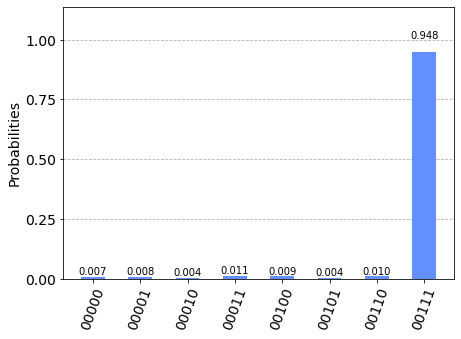

In [1]:
from ibm_quantum_widgets import CircuitComposer
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit.visualization import plot_histogram
from qiskit.providers.ibmq import least_busy

# definition of my registers
qreg_q = QuantumRegister(5, 'q')
creg_c = ClassicalRegister(5, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

# initialisation of my states
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])


circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4])

#############################################################################################
#                                      ITERATION 1                                         #
#############################################################################################

# Oracle iteration 1
circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[3])
circuit.ccx(qreg_q[2], qreg_q[3], qreg_q[4])
circuit.cz(qreg_q[4], qreg_q[2])
circuit.ccx(qreg_q[2], qreg_q[3], qreg_q[4])
circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[3])
# barrier
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4])
# diffuser iteration 1
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.x(qreg_q[0])
circuit.x(qreg_q[1])
circuit.x(qreg_q[2])
circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[3])
circuit.ccx(qreg_q[2], qreg_q[3], qreg_q[4])
circuit.cz(qreg_q[4], qreg_q[2])
circuit.ccx(qreg_q[2], qreg_q[3], qreg_q[4])
circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[3])
circuit.x(qreg_q[0])
circuit.x(qreg_q[1])
circuit.x(qreg_q[2])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
# barrier
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4])

#############################################################################################
#                                      ITERATION 2                                         #
#############################################################################################

# Oracle iteration 2
circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[3])
circuit.ccx(qreg_q[2], qreg_q[3], qreg_q[4])
circuit.cz(qreg_q[4], qreg_q[2])
circuit.ccx(qreg_q[2], qreg_q[3], qreg_q[4])
circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[3])
# barrier
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4])
# diffuser iteration 2
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.x(qreg_q[0])
circuit.x(qreg_q[1])
circuit.x(qreg_q[2])
circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[3])
circuit.ccx(qreg_q[2], qreg_q[3], qreg_q[4])
circuit.cz(qreg_q[4], qreg_q[2])
circuit.ccx(qreg_q[2], qreg_q[3], qreg_q[4])
circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[3])
circuit.x(qreg_q[0])
circuit.x(qreg_q[1])
circuit.x(qreg_q[2])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
# barrier
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4])

# measurements

circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])



aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(circuit)
result = aer_sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)



ibmqfactory.load_account:WARNING:2022-05-03 16:46:08,919: Credentials are already in use. The existing account in the session will be replaced.


Running on current least busy device:  ibmq_belem
least busy backend:  ibmq_belem
Job Status: job has successfully run


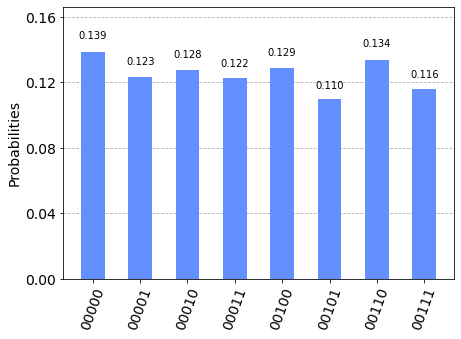

In [15]:
# Load IBM Q account and get the least busy backend device
provider = IBMQ.load_account()
provider = IBMQ.get_provider("ibm-q")
device = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 5 and 
                                   not x.configuration().simulator and x.status().operational==True))
print("Running on current least busy device: ", device)

backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 5 and 
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor
transpiled_grover_circuit = transpile(circuit, device, optimization_level=3)
job = device.run(transpiled_grover_circuit)
job_monitor(job, interval=2)

# Get the results from the computation
results = job.result()
answer = results.get_counts(circuit)
plot_histogram(answer)

In [16]:

editor = CircuitComposer(circuit=circuit)
editor

CircuitComposer(circuit=<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7fb2ca65c340>)